<a href="https://colab.research.google.com/github/Aakarsh204/Recommender-System/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, train_test_split
from sklearn.metrics.pairwise import linear_kernel

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357282 sha256=066e8add31751da6878ca8bfd919943ccdbe42e293c880d81c54c6224018e48e
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [3]:
data = pd.read_csv('/content/drive/MyDrive/ML Data Sets/Briskk Recommender Dataset/amazon.csv')

# Exploratory Data Analysis

## Analysis I


In [4]:
# Viewing the first 5 entries in dataframe
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
# Viewing the column names
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [6]:
# Viewing the shape of the dataframe
r, c = data.shape
print(f'The dataset has {r} rows and {c} columns')

The dataset has 1465 rows and 16 columns


In [7]:
# General information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [8]:
# Counting the number of null values per column
data.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


## Observations I
- Rows: 1465, Columns: 16
- Column names:
       'product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'
- There are two null values in the 'rating' column
- All columns are of type `object`

## Analysis II

We want to preprocess the data by changing the numeric values to a numeric data type. This includes:
- discounted_price
- actual_price
- discount_percentage
- rating
- rating_count

In [9]:
# Replacing the commas and the rupee symbol to convert to a float datatype
data['discounted_price'] = data['discounted_price'].astype(str).str.replace("₹",'').str.replace(",",'').astype('float64')
data['actual_price'] = data['actual_price'].astype(str).str.replace("₹",'').str.replace(",",'').astype('float64')

In [10]:
# Removing the % sign
data['discount_percentage'] = data['discount_percentage'].astype(str).str.replace("%",'').astype('float64')
data['discount_percentage'] = data['discount_percentage']/100

We also need to handle the two null values of 'rating' column, which we can:
- impute by using the median rating across the dataset
- drop (as there are only two products, it won't affect us much)
- collect data (go to the link provided in the dataset and check the actual rating)

In [11]:
# Checking distribution of values of ratings
data['rating'].value_counts(sort=True)

,count
rating,
4.1,244
4.3,230
4.2,228
4.0,129
3.9,123
4.4,123
3.8,86
4.5,75
4,52


As we can see, we have an abnormal rating value '|'
We can handle that by using the same methods discussed above for the null values

In [12]:
# Look at the abnormal product rating
abnormal_value = data.query('rating == "|"')
link = abnormal_value['product_link']
id = abnormal_value['product_id']
print(link)
print(id)

1279    https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...
Name: product_link, dtype: object
1279    B08L12N5H1
Name: product_id, dtype: object


The link seems to be invalid, or missing, so I searched for the item manually, but for automation purposes, such values may be imputed or removed

In [13]:
data['rating'] = data['rating'].str.replace('|', '3.9').astype('float64')

In [14]:
data['rating_count'] = data['rating_count'].astype(str).str.replace(",",'').astype('float64')

In [15]:
# Impute missing values
data['rating_count'] = data.rating_count.fillna(value=data['rating_count'].median())

Now that abnormal and null values have been handled, time to check for duplicates

In [16]:
data.duplicated().any()

False

## Observations II
- The null values have been removed
- Data has been formatted into appropriate data types
- Abnormals and duplicates have been handled


## Data Preparation

Knowing the rating of the product is not enough, it's popularity is also determined by how many users rated it, i.e. how many users purchased it. So we will create a new column to store weighted ratings

In [17]:
# Creating the column "rating_weighted"
data['rating_weighted'] = data['rating'] * data['rating_count']

Moreover, we can see that the category follows a hierarchical format:
Computers & Accessories -> Accessories & Peripherals -> Mobile -> Charging Cables
This can be simplified into a main category Computers and Accessories and a subcategory Charging Cables. So we will create two new columns for that as well

In [18]:
data['main_category'] = data['category'].str.split('|').str[0]
data['subcategory'] = data['category'].str.split('|').str[-1]

In [19]:
data['main_category'].value_counts()

,count
main_category,
Electronics,526
Computers&Accessories,453
Home&Kitchen,448
OfficeProducts,31
MusicalInstruments,2
HomeImprovement,2
Toys&Games,1
Car&Motorbike,1
Health&PersonalCare,1


In [20]:
data['subcategory'].value_counts()

,count
subcategory,
USBCables,233
SmartWatches,76
Smartphones,68
SmartTelevisions,63
In-Ear,52
...,...
InternalHardDrives,1
WoodenPencils,1
BatteryChargers,1


In [21]:
# Removing unimportant columns
data = data.drop(['img_link', 'product_link'], axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  rating_weighted      1465 non-null   float64
 15  main_category        1465 non-null   o

## Visualization

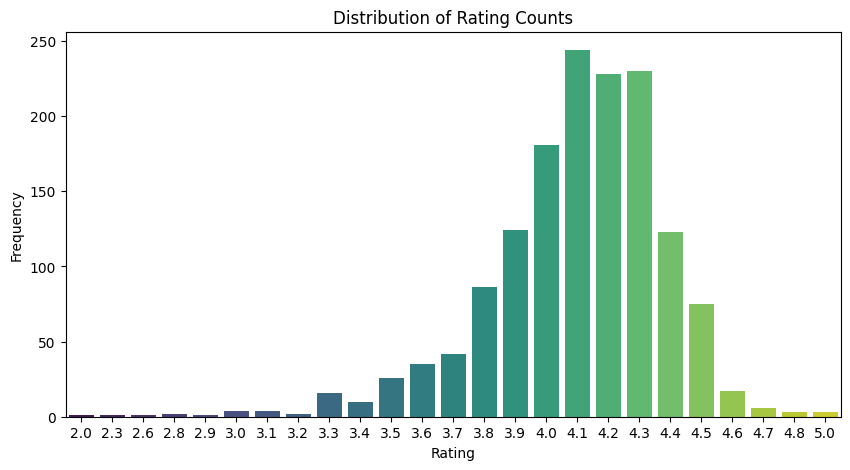

In [23]:
# Plotting rating values
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='rating', palette='viridis')
plt.title('Distribution of Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

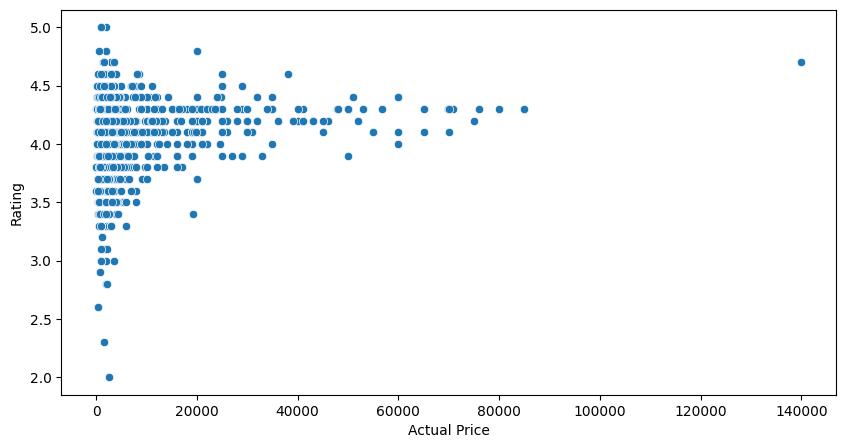

In [24]:
# Plot actual price vs. rating
plt.figure(figsize=(10, 5))
sns.scatterplot(data = data, x = 'actual_price', y = 'rating')
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.show()

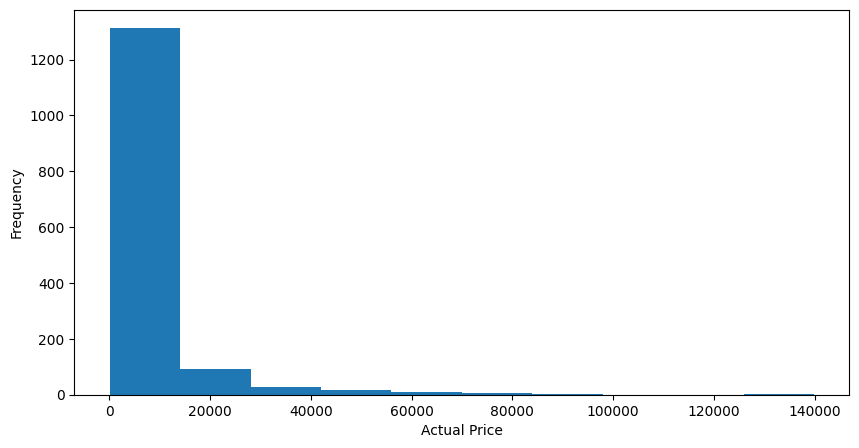

In [25]:
# Plot distribution of actual_price
plt.figure(figsize=(10, 5))
plt.hist(data['actual_price'])
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

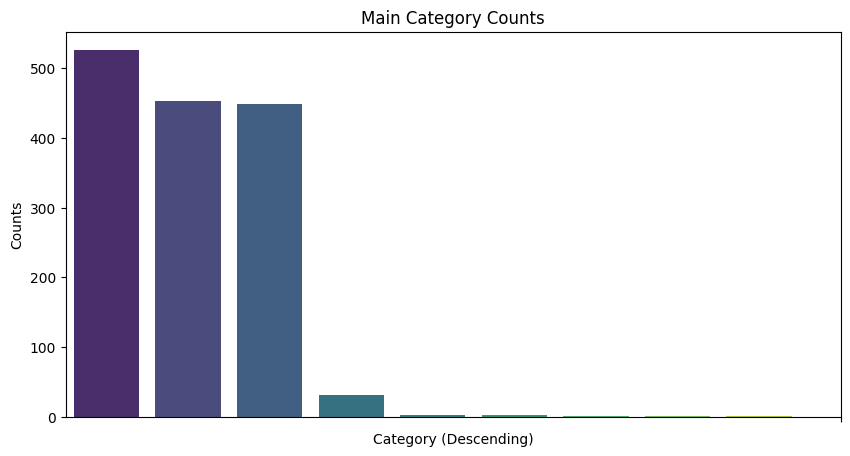



         Main Category  Number of Products
          Electronics                 526
Computers&Accessories                 453
         Home&Kitchen                 448
       OfficeProducts                  31
   MusicalInstruments                   2
      HomeImprovement                   2
           Toys&Games                   1
        Car&Motorbike                   1
  Health&PersonalCare                   1


In [26]:
# Plotting main category counts
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='main_category', palette='viridis', order=data['main_category'].value_counts().index)
plt.title('Main Category Counts')
plt.xlabel('Category (Descending)')
plt.ylabel('Counts')
plt.xticks('')
plt.show()

# Display categories
main_category_counts = data['main_category'].value_counts()
main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('\n\n', main_categories.to_string(index = False))

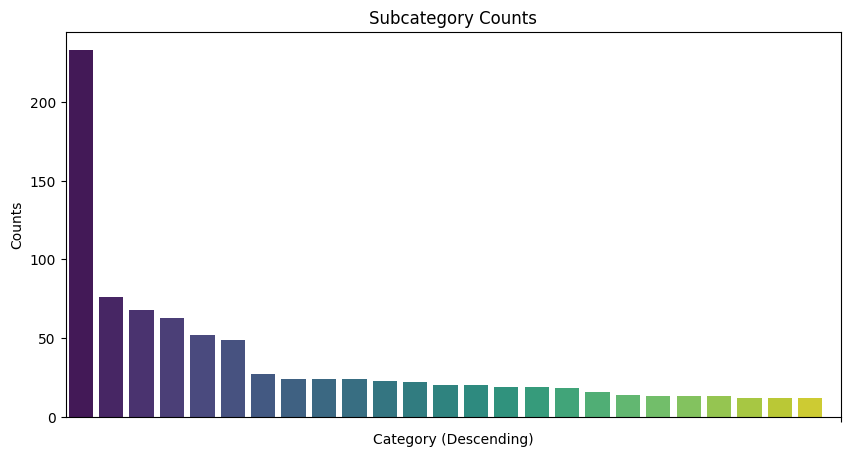



            Subcategory  Number of Products
             USBCables                 233
          SmartWatches                  76
           Smartphones                  68
      SmartTelevisions                  63
                In-Ear                  52
        RemoteControls                  49
         MixerGrinders                  27
            HDMICables                  24
              DryIrons                  24
                  Mice                  24
   InstantWaterHeaters                  23
           LintShavers                  22
            FanHeaters                  20
       ElectricHeaters                  20
       ElectricKettles                  19
          HandBlenders                  19
   WirelessUSBAdapters                  18
          WallChargers                  16
              Lapdesks                  14
        LaundryBaskets                  13
               MicroSD                  13
    Kettle&ToasterSets                  13
        

In [27]:
# Plotting the top 25 subcategory counts
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='subcategory', palette='viridis', order=data['subcategory'].value_counts()[:25].index)
plt.title('Subcategory Counts')
plt.xlabel('Category (Descending)')
plt.ylabel('Counts')
plt.xticks('')
plt.show()

# Display category counts
subcategory_counts = data['subcategory'].value_counts()[:25]
subcategories = pd.DataFrame({'Subcategory': subcategory_counts.index, 'Number of Products': subcategory_counts.values})
print('\n\n', subcategories.to_string(index = False))

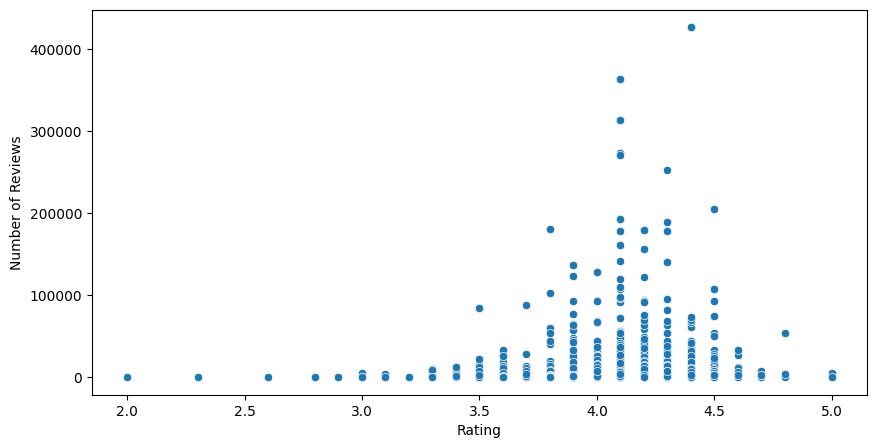

In [28]:
# Plot rating count vs. rating
plt.figure(figsize=(10, 5))
sns.scatterplot(data = data, x = 'rating', y = 'rating_count')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [29]:
bins = [0, 1, 2, 3, 4, 5] # Define bin edges
data['cluster'] = pd.cut(data['rating'], bins=bins, include_lowest=True, labels=['0-1', '1-2', '2-3', '3-4', '4-5'])
table = data['cluster'].value_counts().reset_index().rename(columns={'cluster': 'Rating', 'count': 'Number of Reviews'})
print(table)

  Rating  Number of Reviews
0    4-5                929
1    3-4                526
2    2-3                  9
3    1-2                  1
4    0-1                  0


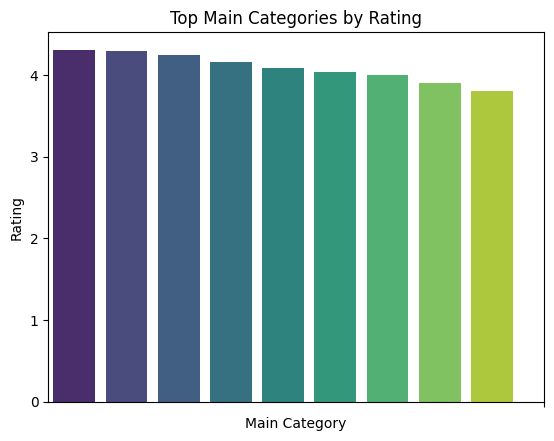




                 Category    Rating
0         OfficeProducts  4.309677
1             Toys&Games  4.300000
2        HomeImprovement  4.250000
3  Computers&Accessories  4.154967
4            Electronics  4.081749
5           Home&Kitchen  4.040402
6    Health&PersonalCare  4.000000
7     MusicalInstruments  3.900000
8          Car&Motorbike  3.800000


In [30]:
# Calculate the top main categories by rating
top = data.groupby(['main_category'])['rating'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data = top, x = 'main_category', y = 'rating', palette = 'viridis')
plt.xlabel('Main Category')
plt.ylabel('Rating')
plt.title('Top Main Categories by Rating')
plt.xticks('')
plt.show()
ranking = data.groupby('main_category')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'main_category': 'Category', 'rating': 'Rating'})
print('\n\n\n',ranking)

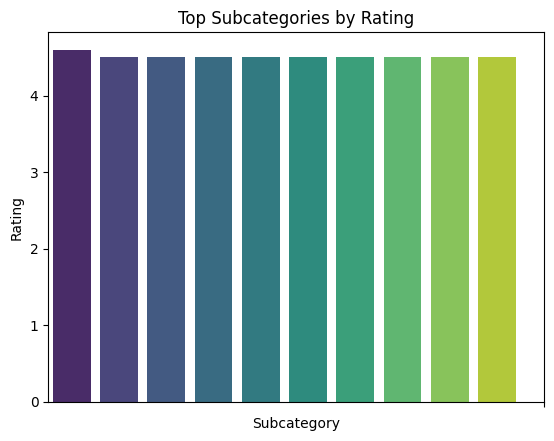




                             Category  Rating
0                            Tablets     4.6
1                               Film     4.5
2                             Memory     4.5
3    SmallApplianceParts&Accessories     4.5
4                   StreamingClients     4.5
..                               ...     ...
202                   InkjetPrinters     3.6
203                       PCHeadsets     3.5
204                        3DGlasses     3.5
205                       DustCovers     3.4
206                 ElectricGrinders     3.3

[207 rows x 2 columns]


In [31]:
# Calculate the top subcategories by rating
top = data.groupby(['subcategory'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data = top, x = 'subcategory', y = 'rating', palette = 'viridis')
plt.xlabel('Subcategory')
plt.ylabel('Rating')
plt.title('Top Subcategories by Rating')
plt.xticks('')
plt.show()
ranking = data.groupby('subcategory')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'subcategory': 'Category', 'rating': 'Rating'})
print('\n\n\n',ranking)

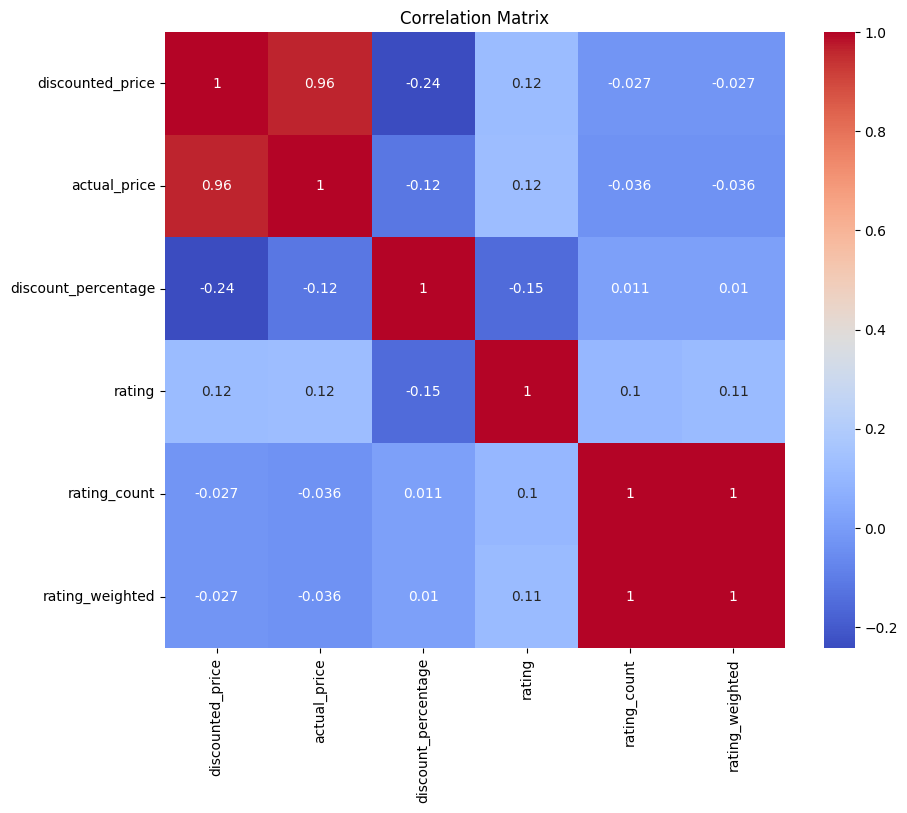

In [32]:
# Get Correlation Matrix to view relations
numeric_cols = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can note the following things from the correlation matrix:
- There is a weak positive correlation between the overall rating and both the rating count and the weighted rating. This suggests that products with higher ratings might have more reviews and higher weighted ratings.
- There is a moderate positive correlation (0.121) between the rating and discounted price, indicating that customers may be more likely to rate a product higher if it is discounted.

## Observations III
- Most products have a low price, and expensive products are very few
- Highest provided rating is 4.1
- Most ratings lie within the range 4-5
- Higher ratings have more reviews i.e. more purchases
- Top 3 Main Categories are (By Purchases):
  - Electronics
  - Computers and Accessories
  - Home and Kitchen
- Top 3 Subcategories are (By Purchases):
  - USB Cables
  - Smartwatches
  - Smartphones
- Top 3 Main Categories are (By Ratings):
  - Office Products
  - Toys and Games
  - Home Improvement
- Top 3 Subcategories are (By Ratings):
  - Tablets
  - Film
  - Memory

# Recommendation Model

## Data Cleaning

In [33]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'rating_weighted', 'main_category', 'subcategory',
       'cluster'],
      dtype='object')

In [34]:
# Converting text to lowercase, removing special characters, links and stopwords
def clean_text(text):
    text = text.lower()
    text = text.replace('&', ' and ')
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    pattern = r'http\S*?\.(com|in)'
    text = re.sub(pattern, '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [35]:
# Applying the function to all valid columns
data['product_name'] = data['product_name'].apply(clean_text)
data['about_product'] = data['about_product'].apply(clean_text)
data['review_title'] = data['review_title'].apply(clean_text)
data['review_content'] = data['review_content'].apply(clean_text)
data['category'] = data['category'].apply(clean_text)
data['main_category'] = data['main_category'].apply(clean_text)
data['subcategory'] = data['subcategory'].apply(clean_text)

In [36]:
# Dropping irrelevant columns that are not needed for prediction
columns_to_drop = ['discounted_price', 'actual_price', 'discount_percentage', 'user_name', 'review_id', 'cluster', 'rating_weighted']
data = data.drop(columns_to_drop, axis=1)

In [37]:
len(data['user_id'].value_counts())

1194

One issue I observed in the data was for each Product ID, there was a comma separated list of User ID values, and corresponding Review Title values. Since it was impossible to distinguish Review Content values I ended up splitting only User ID and Review Title values.

This increases our data by giving us a proper history of each user instead of considering only one user from among the list of users.

The second issue was that to explode both User ID with Review Title, they needed to be of matching lengths but there were not always enough Review Titles. So I decided to pad the Review Titles with empty strings to make it match the User ID length.

In [38]:
# Split both user_id and review_title columns by commas
data['user_id'] = data['user_id'].str.split(',')
data['review_title'] = data['review_title'].str.split(',')

# Pad the lists to ensure equal length by filling with empty strings
data['user_id'], data['review_title'] = zip(*data.apply(
    lambda row: (row['user_id'], row['review_title'] + [''] * (len(row['user_id']) - len(row['review_title'])))
    if len(row['user_id']) > len(row['review_title'])
    else (row['user_id'], row['review_title']),
    axis=1
))

# Explode both columns to create a new row for each user-review pair
data = data.explode(['user_id', 'review_title'], ignore_index=True)

In [39]:
# Final check to make sure no User ID is null
data['user_id'].isnull().sum()

0

In [40]:
len(data['user_id'].value_counts())

9050

As you can see, our data increased almost 9-fold

In [41]:
# Combining the columns to get all product details
data['product_details'] = data['main_category'] + ' ' + data['subcategory'] + ' ' + data['product_name'] + ' ' + data['about_product'] + ' ' + data['review_title'] + data['review_content']
data['product_details'] = data['product_details'].fillna('')

Label encoding the data turns it from string to numeric values, which essentially makes it easier for us to understand.

In [42]:
le_user = LabelEncoder()
le_product = LabelEncoder()
data['user_id'] = le_user.fit_transform(data['user_id'])
data['product_id'] = le_product.fit_transform(data['product_id'])

## Content Based Filtering

Content based filtering is a method used in recommender systems wherein the system takes into account the user's preferences by recommending products similar to a product in their past purchases

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(stop_words='english',max_df=0.95,min_df=2,ngram_range=(1,1))
tfidf_matrix = tfidf_vec.fit_transform(data['product_details'])

In [44]:
tfidf_matrix.shape

(11503, 35036)

In [62]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def content_based_recommendations(product_id, data, cosine_sim, n=5):
    # Filter to only rows matching the product_id
    product_row = data[data['product_id'] == product_id]
    if product_row.empty:
        raise ValueError(f"Product ID '{product_id}' not found in the dataset.")

    # Get the index for the first occurrence of the given product_id
    idx = product_row.index[0]

    # Calculate similarity scores for the product
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Exclude the product itself and ensure unique product recommendations
    unique_product_ids = set()
    unique_sim_scores = []
    for i, score in sim_scores:
        product_i = data.iloc[i]['product_id']
        if product_i != product_id and product_i not in unique_product_ids:
            unique_product_ids.add(product_i)
            unique_sim_scores.append((i, score))
        if len(unique_sim_scores) >= n:
            break

    # Get the top-n unique recommendations
    product_indices = [i[0] for i in unique_sim_scores]

    # Return only the specified columns for each unique product
    recommended_data = data.iloc[product_indices].drop_duplicates(subset='product_id')
    recommended_data = recommended_data[['product_id', 'product_name', 'category', 'rating', 'about_product']]

    return recommended_data, unique_sim_scores


In [46]:
content_based_recommendations

,product_id,product_name,category,rating,about_product
10880,1317,vapja portable mini juicer cup blender usb rec...,home kitchenkitchen homeappliancessmallkitchen...,3.6,usb rechargeable great portability personal bl...
8927,997,instacuppa portable blender smoothie milk shak...,home kitchenkitchen homeappliancessmallkitchen...,4.1,blends fast quick personal blender powered 150...
9821,240,inalsa hand blender 1000 watt chopper whisker ...,home kitchenkitchen homeappliancessmallkitchen...,4.4,handheld blending power power 1000w input supp...
8944,397,kent 16044 hand blender stainless steel 400 w ...,home kitchenkitchen homeappliancessmallkitchen...,4.1,kent 400w hand blender handy yet powerful kitc...
9009,1170,instacuppa portable blender smoothie milk shak...,home kitchenkitchen homeappliancessmallkitchen...,4.5,blends fast quick personal blender powered 230...


In [47]:
# Get the recommended product IDs
recommended_product_ids = content_based_recommendations['product_id'].tolist()

# Get ratings for the recommended products and group by product_id
ratings_for_recommended_items = data[data['product_id'].isin(recommended_product_ids)]

# Group by product_id and aggregate the ratings (using mean as an example)
grouped_ratings = ratings_for_recommended_items.groupby('product_id')['rating'].mean().reset_index()

# Define a threshold for relevance
threshold = 4

# Assign binary relevance labels based on the threshold
ground_truth = [1 if rating >= threshold else 0 for rating in grouped_ratings['rating']]

# Get predicted relevance scores from the content-based recommendation system
predicted_scores = [tup[1] for tup in p_sim_score]

print("Ground Truth:", ground_truth)
print("Predicted Relevance Scores:", predicted_scores)


Ground Truth: [1, 1, 1, 1, 0]
Predicted Relevance Scores: [0.3073188907396578, 0.2743939214947898, 0.263928872422717, 0.2248041039585213, 0.22409196423420705]


In [49]:
from sklearn.metrics import average_precision_score

ap = average_precision_score(ground_truth, predicted_scores)
print("Average Precision (AP):", ap)

Average Precision (AP): 1.0


## Collaborative Filtering

In collaborative filtering, the system computes user-user similarity to recommend items that one user bought to the other, as both users are now classified as similar

In [54]:
# Training CF Model
reader = Reader(rating_scale=(1, 5))
df = Dataset.load_from_df(data[['user_id', 'product_id', 'rating']], reader)
trainset, testset = train_test_split(df, test_size=0.2)
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

for prediction in predictions[:5]:
    print('User:', prediction.uid)
    print('Item:', prediction.iid)
    print('Actual Rating:', prediction.r_ui)
    print('Predicted Rating:', prediction.est)
    print()

RMSE: 0.1720
User: 6719
Item: 1267
Actual Rating: 4.0
Predicted Rating: 4.042093291093195

User: 7834
Item: 477
Actual Rating: 3.9
Predicted Rating: 4.037939372262688

User: 2513
Item: 437
Actual Rating: 4.0
Predicted Rating: 4.031180979084236

User: 4802
Item: 1040
Actual Rating: 3.8
Predicted Rating: 4.00445872699829

User: 6887
Item: 1102
Actual Rating: 4.0
Predicted Rating: 4.013429611471956



In [55]:
# Run cross-validation to evaluate the model
results = cross_validate(algo, df, measures=['RMSE', 'MAE'], cv=10, verbose=True)

# Print results
print("Mean RMSE:", results['test_rmse'].mean())
print("Mean MAE:", results['test_mae'].mean())

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.1644  0.1713  0.1658  0.1724  0.1644  0.1702  0.1671  0.1704  0.1931  0.1773  0.1716  0.0081  
MAE (testset)     0.1211  0.1283  0.1240  0.1254  0.1218  0.1276  0.1236  0.1232  0.1305  0.1260  0.1251  0.0028  
Fit time          0.61    0.93    1.12    0.84    0.85    1.14    0.71    0.73    0.72    0.61    0.82    0.18    
Test time         0.03    0.02    0.03    0.02    0.03    0.01    0.01    0.01    0.03    0.02    0.02    0.01    
Mean RMSE: 0.17164484989607784
Mean MAE: 0.12514119682382113


In [56]:
# Saving the collaborative filtering model
import joblib
joblib.dump(algo, 'cfmodel.pkl')

['cfmodel.pkl']

In [93]:
def combined_recommendations(user_id, product_id, data, cosine_sim, svd_model, content_weight=0.5, collaborative_weight=0.5, n=5):
# Generate a combined recommendation using both content-based and collaborative filtering.

    # Get content-based recommendations
    content_based_recommendations_data, p_sim_score = content_based_recommendations(product_id, data, cosine_sim, n)

    # Get product_ids from content-based recommendations
    recommended_product_ids = content_based_recommendations_data['product_id'].tolist()

    # Get collaborative filtering predictions for recommended products
    collaborative_predictions = []
    for product in recommended_product_ids:
        # Predict the rating for the user-product pair using the trained SVD model
        prediction = svd_model.predict(user_id, product)
        collaborative_predictions.append((product, prediction.est))

    # Merge content-based and collaborative predictions
    combined_scores = []
    for content_product, content_score in zip(recommended_product_ids, p_sim_score):
        # Find the corresponding collaborative score
        collaborative_score = next((score for pid, score in collaborative_predictions if pid == content_product), 0)

        # Combine the scores using the weights
        combined_score = (content_weight * content_score[1]) + (collaborative_weight * collaborative_score)
        combined_scores.append((content_product, combined_score))

    # Sort the combined scores by the weighted score
    sorted_combined_scores = sorted(combined_scores, key=lambda x: x[1], reverse=True)

    # Get the top `n` recommendations
    top_recommendations = sorted_combined_scores[:n]

    # Retrieve product details for the top recommendations and remove duplicates based on product_id
    top_recommendation_ids = [product_id for product_id, _ in top_recommendations]
    final_recommendations = data[data['product_id'].isin(top_recommendation_ids)].drop_duplicates(subset='product_id')

    return final_recommendations[['product_id', 'product_name', 'category', 'rating', 'about_product']], top_recommendations


In [104]:
# Converting to a dense array for computation
cosine_sim = cosine_sim_sparse.toarray()
preds, scores = combined_recommendations(6887, 1102, data, cosine_sim, algo)

In [101]:
# Converting to a sparse matrix
from scipy.sparse import csr_matrix
cosine_sim_sparse = csr_matrix(cosine_sim)

In [102]:
# Saving cosine similarity matrix
from scipy import sparse
sparse.save_npz('cosine_sim_sparse2.npz', cosine_sim_sparse)